Welcome to Snakes and Ladders.

Enter the number of players: 4
Enter a player's name: A
Enter a player's name: E
Enter a player's name: J
Enter a player's name: H


A
Min:  7
Median:  19.0
Max:  150
*********


E
Min:  7
Median:  19
Max:  117
*********


J
Min:  7
Median:  19
Max:  106
*********


H
Min:  7
Median:  19.0
Max:  131
*********


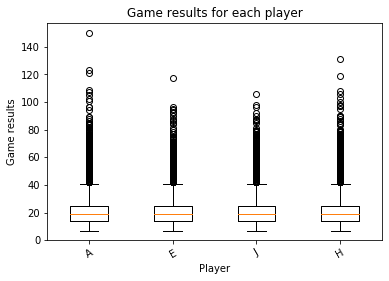

In [1]:
"""
Created on Thu Aug  6 00:16:06 2020

@author: alina

A simulation of the game "Snakes and Ladders". XXXXXXXXXXXXXX
"""
import random
import matplotlib.pyplot as plt
import statistics
import pyinputplus as pyip
import timeit

# random.seed(1)
##### classes
class Board():
    """A class representing the game's board."""
    def __init__(self):
        self.ladders = {1: 38, 4: 14, 9: 31, 21: 42, 28: 84, 36: 44, 51: 67, 71: 91, 80:100}
        self.snakes = {16: 6, 48: 30, 64: 60, 79: 19, 93: 68, 95: 24, 97: 76, 98: 78}
        self.squares = {num: 'empty' for num in range(1, 101)}
    
    def update_board(self, player_position, player_name, player_prev_position):
        """Returns the updated board after each move."""
        self.squares[player_position] = player_name
        self.squares[player_prev_position] = 'empty'
        
class Die():
    """A class representing a single D6 die."""
    def __init__(self):
        self.num_sides = 6

    def roll(self):
        """Return a random value between 1 and num_sides."""
        return random.randint(1, self.num_sides)

class Player(Die):
    """A class representing a player."""
    def __init__(self, name):
        super().__init__()
        self.name = name
        self.position = 0
        self.all_positions = [0]
  
    def move(self, die_roll):
        """ (int) -> int
        Return the new position of player after rolling the die."""
        self.position += die_roll
        return self.position
    
    def landing(self, current_square, board):
        """ (self.position, Board object) -> self.position
        Evaluate the board and return where the player 'lands'."""
        if current_square > 100:
            n = current_square - 100
            self.position = 100 - n
            current_square = self.position
                    
        if current_square in board.ladders.keys():
            self.position = board.ladders[current_square]
        elif current_square in board.snakes.keys():
            self.position = board.snakes[current_square]
        
        if board.squares[current_square] != 'empty':
            self.position = 0
        
        self.all_positions.append(self.position)


    def win(self):
        """Return True if Player has reached the 100th square of the board."""
        if self.position == 100:
            return True


def input_players():  ######### THIS METHOD WORKS, I CHECKED
    """
    Asks the user for the number of players and their names.
    Create the Player objects.
    Return a dict called players containing all players.
    """
    num_players = int(pyip.inputChoice(['1', '2', '3', '4'], prompt="Enter the number of players: "))
    
    players = {}
    for num in range(num_players):
        player_name = input("Enter a player's name: ")
        player = Player(player_name)
        players[num] = player
    
    return players


def play_game(players):
    """
    (dict) -> stats XXXXXXXXXXXXXXXXXXX
    Runs a simulation of one game.
    Returns the winner's name and the number of times she had to roll the die to win.
    """
    board = Board()
    counter = 0
    
    while board.squares[100] == 'empty':
        counter += 1
        # print("round", counter)
        for player in players.keys():
            current_square = players[player].move(players[player].roll())
            players[player].landing(current_square, board)
            player_position = players[player].position
            player_name = players[player].name
            player_prev_position = players[player].all_positions[-1]
            # print(player_name, player_position, players[player].all_positions)
            board.update_board(player_position, player_name, player_prev_position)
            if players[player].win():
                # print("{} wins!".format(players[player].name))
                board.squares[100] = players[player].name
                break

    return players[player].name, counter



### GAME SIMULATION STARTS HERE
print("Welcome to Snakes and Ladders.\n")
# Create players
players = input_players()
results = {}
for player in players:
    results[players[player].name] = []
# simulate games
for n in range(100000):
    result = play_game(players)
    results[result[0]].append(result[1])
    # reset player's position attributes before next game
    for player in players:
        players[player].position = 0
        players[player].all_positions = []

# print(results)
for player in players:
    print("\n")
    print(players[player].name)
    print("Min: ", min(results[players[player].name]))
    print("Median: ", statistics.median(results[players[player].name]))
    print("Max: ", max(results[players[player].name]))                                           
    print("*" * 9)

# plot the results
##### ARMAR UN BOXPLOT x JUGADOR (TODOS EN UN MISMO GRAF) Y UNO GLOBAL APARTE  
data = [value for value in results.values()]
names = [key for key in results.keys()]
fig1, ax1 = plt.subplots()
ax1.set_title("Game results for each player")
ax1.boxplot(data)
ax1.set_xlabel("Player")
ax1.set_ylabel("Game results")
ax1.set_xticklabels(names, rotation=30, fontsize=10)
plt.show()